In [8]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 
import tensorflow as tf

In [10]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)
print(total_words)

--2020-12-06 03:18:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.217.5.240, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.002s  

2020-12-06 03:18:14 (51.4 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

3211


In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
adam = Adam(lr=0.003)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              308224    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              3291275   
Total params: 4,762,999
Trainable params: 4,762,999
Non-trainable params: 0
____________________________________________

In [12]:
 percentage=0.998
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>percentage):
      print(f'\nReached {percentage*100} accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = myCallback()
 history = model.fit(predictors, label, epochs=100, verbose=1, callbacks=[callbacks])

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.7816 - accuracy: 0.0267
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3791 - accuracy: 0.0338
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1248 - accuracy: 0.0446
Epoch 4/100
484/484 [==============================] - 7s 15ms/step - loss: 5.8561 - accuracy: 0.0581
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 5.5605 - accuracy: 0.0706
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 5.2638 - accuracy: 0.0870
Epoch 7/100
484/484 [==============================] - 7s 15ms/step - loss: 4.9516 - accuracy: 0.1070
Epoch 8/100
484/484 [==============================] - 7s 15ms/step - loss: 4.6158 - accuracy: 0.1318
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 4.2780 - accuracy: 0.1635
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 3.921

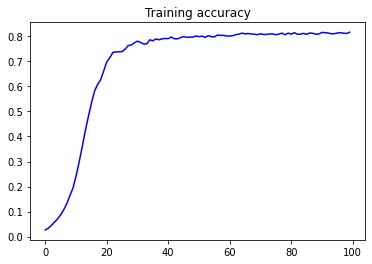

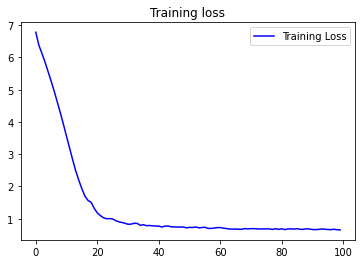

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [14]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope please mine eye awake heart before men array lives he and to recite seem long since more strong minds to the main of proud compare them from her feature hate add to thee to my papers yellow'd with her growing age his brow ' in thee it who for my beauty that forth my love bring rare by thy continual haste me i in you should love say to love thee best mine eyes my verse alone had thy charge is thine eyes may willingly still love her in fair date still still being joy fill'd on your power are
